<a href="https://colab.research.google.com/github/teretenuche/Stable_isotopes/blob/Projects/Nuche_trophic_discrimination_factors_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 0. load data in DataFrame
import pandas as pd
import io
import numpy as np

In [ ]:
# 0. load data from file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving TFM_Data_30Abr2020.csv to TFM_Data_30Abr2020.csv
User uploaded file "TFM_Data_30Abr2020.csv" with length 1533 bytes


In [ ]:
df=pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
df

,ID_treatment,ID_species,Temperature,Experiment duration,Tcor,ri_cor,ro_cor,Experimental Wmin,Experimental Wmax,d15N min,d15N max,d15N diet,TDFfinal_static,TDFfinal_dynamic,kg,% Dietary Protein
0,1,1,19.9,180,0.99,0.06,0.007,70.065,140.2,15.6,10.4,3.71,6.69,6.03,0.30281,69.10
1,2,2,11.0,150,0.42,0.37,0.064,10.600,120.3,11.9,14.6,12.49,2.08,1.73,0.15692,18.90
2,3,1,20.4,180,1.04,0.11,0.010,126.040,400.2,12.0,7.9,3.71,4.17,6.56,0.32163,69.10
3,4,3,17.0,90,0.75,0.03,0.019,0.975,2.1,16.1,13.2,9.14,4.04,4.05,0.23835,61.70
4,5,4,19.2,98,0.93,0.12,0.050,1.440,8.8,13.5,7.5,3.80,3.72,4.57,0.23786,50.00
5,6,4,19.2,98,0.93,0.06,0.013,1.440,8.8,13.0,7.5,3.80,3.71,4.79,0.24970,50.00
6,7,5,18.0,102,0.83,0.02,0.012,0.840,1.7,8.2,14.0,15.00,-0.96,2.03,0.11262,53.00
7,8,6,24.1,104,1.46,0.03,0.005,16.900,31.3,13.0,10.1,3.70,6.45,6.38,0.26452,32.00
8,9,7,26.6,94,1.82,0.04,0.004,9.700,42.9,14.4,7.5,3.70,3.78,3.55,0.13330,40.87
9,10,7,26.8,98,1.85,0.05,0.004,9.400,67.6,14.4,7.7,3.70,4.03,4.67,0.17412,40.87


In [ ]:
#Elimino todas las filas que tienen valores nulos
df=df.dropna()
df.isnull().values.any()

False

In [ ]:
df.describe()

,ID_treatment,ID_species,Temperature,Experiment duration,Tcor,ri_cor,ro_cor,Experimental Wmin,Experimental Wmax,d15N min,d15N max,d15N diet,TDFfinal_static,TDFfinal_dynamic,kg,% Dietary Protein
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,9.500000,6.055556,21.644444,112.944444,1.228889,0.100000,0.017500,447.458889,501.138889,12.616667,11.433333,7.991667,3.674444,4.007222,0.187317,50.867222
std,5.338539,2.999455,4.016469,37.492701,0.405795,0.084436,0.017079,1483.319295,1397.593044,2.160678,3.121651,4.372283,2.051508,1.850370,0.083105,13.252244
min,1.000000,1.000000,11.000000,53.000000,0.420000,0.020000,0.004000,0.840000,1.700000,8.200000,7.500000,3.700000,-0.960000,1.500000,0.057690,18.900000
25%,5.250000,4.000000,19.375000,98.000000,0.945000,0.050000,0.005000,9.475000,34.200000,10.775000,7.750000,3.710000,2.272500,2.247500,0.116325,41.177500
50%,9.500000,7.000000,22.000000,98.000000,1.200000,0.060000,0.011000,13.750000,80.000000,12.500000,12.400000,7.370000,3.750000,4.065000,0.175710,51.450000
75%,13.750000,8.000000,23.950000,103.500000,1.440000,0.135000,0.021250,28.000000,147.750000,14.325000,14.300000,12.367500,4.137500,4.940000,0.246862,61.600000
max,18.000000,11.000000,26.900000,196.000000,1.870000,0.370000,0.064000,6236.860000,5896.700000,16.100000,15.700000,15.000000,7.650000,7.650000,0.325530,69.100000


In [ ]:
#Divido el data set
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [ ]:
# 0.1 features and labels

df.reset_index(drop=True, inplace=True)
train = df.loc[0:len(df)*0.3]
test  = df.loc[len(df)*0.7:,]

display_side_by_side(train.tail(),test.head())

,ID_treatment,ID_species,Temperature,Experiment duration,Tcor,ri_cor,ro_cor,Experimental Wmin,Experimental Wmax,d15N min,d15N max,d15N diet,TDFfinal_static,TDFfinal_dynamic,kg,% Dietary Protein
1,2,2,11.0,150,0.42,0.37,0.064,10.600,120.3,11.9,14.6,12.49,2.08,1.73,0.15692,18.9
2,3,1,20.4,180,1.04,0.11,0.010,126.040,400.2,12.0,7.9,3.71,4.17,6.56,0.32163,69.1
3,4,3,17.0,90,0.75,0.03,0.019,0.975,2.1,16.1,13.2,9.14,4.04,4.05,0.23835,61.7
4,5,4,19.2,98,0.93,0.12,0.050,1.440,8.8,13.5,7.5,3.80,3.72,4.57,0.23786,50.0
5,6,4,19.2,98,0.93,0.06,0.013,1.440,8.8,13.0,7.5,3.80,3.71,4.79,0.24970,50.0
,ID_treatment,ID_species,Temperature,Experiment duration,Tcor,ri_cor,ro_cor,Experimental Wmin,Experimental Wmax,d15N min,d15N max,d15N diet,TDFfinal_static,TDFfinal_dynamic,kg,% Dietary Protein
13,14,8,22.0,98,1.20,0.14,0.019,28.00,148.1,10.7,14.9,12.5,2.37,2.14,0.09722,61.3
14,15,8,22.0,98,1.20,0.17,0.025,21.50,153.0,11.0,12.9,10.7,2.24,2.80,0.12744,56.9
15,16,9,23.0,100,1.32,0.06,0.005,10.30,71.5,10.7,15.7,13.8,1.97,4.08,0.17730,51.0
16,17,10,26.0,196,1.73,0.05,0.005,1444.00,1634.0,11.4,11.9,10.3,5.67,1.50,0.05769,62.0


In [ ]:
# reseteamos el index con el fin de no evitar problemas en la validación cruzada
train.reset_index(drop = True, inplace = True)

In [ ]:
##Parametrizacion
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint #Para hacer intervalos aleatorios de los valores

from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
regressor = RandomForestRegressor()

In [ ]:
param_dist = {"n_estimators": [32, 64, 128], # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": [8,4, 2], # Maximum number of levels in tree
              "min_samples_split": [2, 4, 6], #  Minimum number of samples required to split a node
              "min_samples_leaf": [8, 12, 16], # Minimum number of samples required at each leaf node
              "bootstrap": [True, False] # Method of selecting samples for training each tree
            }

In [ ]:
#Busqueda de validacion cruzada
grid_regres = GridSearchCV(estimator = regressor, param_grid= param_dist, cv = 5)

# Fit the random search model
grid_regres.fit(X = train.drop(['TDFfinal_dynamic'], axis=1), 
                           y = train['TDFfinal_dynamic'])

In [ ]:
grid_regres.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=32, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# choose the best
best_grid = grid_regres.best_estimator_

# fit and predict
best_grid.fit( X = train.drop(['TDFfinal_dynamic'], axis=1), y = train['TDFfinal_dynamic'])
y_pred = best_grid.predict(X = test.drop(['TDFfinal_dynamic'], axis = 1))

# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['TDFfinal_dynamic'], y_pred)
print ('MAE', mae)

MAE 2.1947499999999995


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


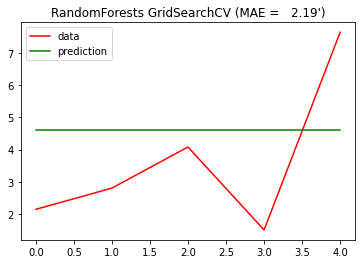

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(test['TDFfinal_dynamic'].shape[0]))
plt.plot(xx, test['TDFfinal_dynamic'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests GridSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

In [ ]:
#Ahora utilizaré la técnica RandomizedSearch
param_dist = {"n_estimators": [4, 8, 16, 32, 64, 128], # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": [16, 12,8,4, 2,None], # Maximum number of levels in tree
              "min_samples_split": sp_randint(2, 50), #  Minimum number of samples required to split a node
              "min_samples_leaf": sp_randint(1, 50), # Minimum number of samples required at each leaf node
              "bootstrap": [True, False], # Method of selecting samples for training each tree
              "criterion": ["mse", "mae"]}

In [ ]:
rnd_regres = RandomizedSearchCV(estimator = regressor, param_distributions = param_dist, 
                               n_iter = 100, cv = 5, random_state=0, n_jobs = -1)

# Fit the random search model
rnd_regres.fit(X = train.drop(['TDFfinal_dynamic'], axis=1), y = train['TDFfinal_dynamic'])

In [ ]:
#Con esto se obtiene la mejor parametrización
rnd_regres.best_params_

In [ ]:
best_random = rnd_regres.best_estimator_
# fit and predict
best_random.fit( X = train.drop(['TDFfinal_dynamic'], axis=1), y = train['TDFfinal_dynamic'])
y_pred = best_random.predict(X = test.drop(['TDFfinal_dynamic'], axis = 1))

# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['TDFfinal_dynamic'], y_pred)
print ('MAE', mae)

MAE 2.39675


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


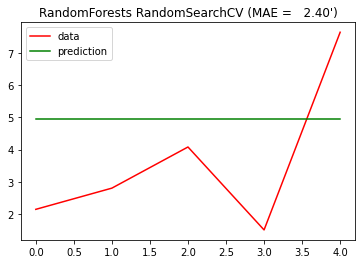

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(test['TDFfinal_dynamic'].shape[0]))
plt.plot(xx, test['TDFfinal_dynamic'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests RandomSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

In [ ]:
#Ahora realizaré una optimización utilizando la técnica de Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

param_dist = {
 "n_estimators": [8, 32, 64, 128],
 "learning_rate" : [0.01,0.05,0.1],
 "loss" : ['linear', 'square', 'exponential']
 }

grid_ada = GridSearchCV(AdaBoostRegressor(DecisionTreeRegressor(criterion='mae')),
                        param_grid = param_dist, cv=5)

grid_ada.fit(X = train.drop(['TDFfinal_dynamic'], axis=1),y = train['TDFfinal_dynamic'])


best_ada = grid_ada.best_estimator_
print (best_ada)
# fit and predict
best_ada.fit( X = train.drop(['TDFfinal_dynamic'], axis=1), y = train['TDFfinal_dynamic'])
y_pred = best_ada.predict(X = test.drop(['TDFfinal_dynamic'], axis = 1))

# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['TDFfinal_dynamic'], y_pred)
print ('MAE', mae)

In [ ]:
#Por último lo haré para GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor

param_dist = {
 "n_estimators": [32, 64, 128],
 "learning_rate" : [0.01,0.05,0.1,0.25,0.5],
  "max_features" : ["auto", "sqrt"],
 "loss" : ['ls', 'lad', 'huber', 'quantile'],
 "criterion": ['mae', 'friedman_mse']
 }

grid_gb = GridSearchCV(GradientBoostingRegressor(), param_grid = param_dist, cv=5)

grid_gb.fit(X = train.drop(['TDFfinal_dynamic'], axis=1),y = train['TDFfinal_dynamic'])


best_gb = grid_gb.best_estimator_
print (best_gb)
# fit and predict
best_gb.fit( X = train.drop(['TDFfinal_dynamic'], axis=1), y = train['TDFfinal_dynamic'])
y_pred = best_gb.predict(X = test.drop(['TDFfinal_dynamic'], axis = 1))

# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['TDFfinal_dynamic'], y_pred)
print ('MAE', mae)

Voy a realizar estos análisis para el otro factor de discriminación trófica, que es el más usado en la literatura (TDFfinal_static)

In [ ]:
df

,ID_treatment,ID_species,Temperature,Experiment duration,Tcor,ri_cor,ro_cor,Experimental Wmin,Experimental Wmax,d15N min,d15N max,d15N diet,TDFfinal_static,TDFfinal_dynamic,kg,% Dietary Protein
0,1,1,19.9,180,0.99,0.06,0.007,70.065,140.2,15.6,10.4,3.71,6.69,6.03,0.30281,69.10
1,2,2,11.0,150,0.42,0.37,0.064,10.600,120.3,11.9,14.6,12.49,2.08,1.73,0.15692,18.90
2,3,1,20.4,180,1.04,0.11,0.010,126.040,400.2,12.0,7.9,3.71,4.17,6.56,0.32163,69.10
3,4,3,17.0,90,0.75,0.03,0.019,0.975,2.1,16.1,13.2,9.14,4.04,4.05,0.23835,61.70
4,5,4,19.2,98,0.93,0.12,0.050,1.440,8.8,13.5,7.5,3.80,3.72,4.57,0.23786,50.00
5,6,4,19.2,98,0.93,0.06,0.013,1.440,8.8,13.0,7.5,3.80,3.71,4.79,0.24970,50.00
6,7,5,18.0,102,0.83,0.02,0.012,0.840,1.7,8.2,14.0,15.00,-0.96,2.03,0.11262,53.00
7,8,6,24.1,104,1.46,0.03,0.005,16.900,31.3,13.0,10.1,3.70,6.45,6.38,0.26452,32.00
8,9,7,26.6,94,1.82,0.04,0.004,9.700,42.9,14.4,7.5,3.70,3.78,3.55,0.13330,40.87
9,10,7,26.8,98,1.85,0.05,0.004,9.400,67.6,14.4,7.7,3.70,4.03,4.67,0.17412,40.87


In [ ]:
#Divido el data set
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [ ]:
# 0.1 features and labels

df.reset_index(drop=True, inplace=True)
train = df.loc[0:len(df)*0.3]
test  = df.loc[len(df)*0.7:,]

display_side_by_side(train.tail(),test.head())

,ID_treatment,ID_species,Temperature,Experiment duration,Tcor,ri_cor,ro_cor,Experimental Wmin,Experimental Wmax,d15N min,d15N max,d15N diet,TDFfinal_static,TDFfinal_dynamic,kg,% Dietary Protein
1,2,2,11.0,150,0.42,0.37,0.064,10.600,120.3,11.9,14.6,12.49,2.08,1.73,0.15692,18.9
2,3,1,20.4,180,1.04,0.11,0.010,126.040,400.2,12.0,7.9,3.71,4.17,6.56,0.32163,69.1
3,4,3,17.0,90,0.75,0.03,0.019,0.975,2.1,16.1,13.2,9.14,4.04,4.05,0.23835,61.7
4,5,4,19.2,98,0.93,0.12,0.050,1.440,8.8,13.5,7.5,3.80,3.72,4.57,0.23786,50.0
5,6,4,19.2,98,0.93,0.06,0.013,1.440,8.8,13.0,7.5,3.80,3.71,4.79,0.24970,50.0
,ID_treatment,ID_species,Temperature,Experiment duration,Tcor,ri_cor,ro_cor,Experimental Wmin,Experimental Wmax,d15N min,d15N max,d15N diet,TDFfinal_static,TDFfinal_dynamic,kg,% Dietary Protein
13,14,8,22.0,98,1.20,0.14,0.019,28.00,148.1,10.7,14.9,12.5,2.37,2.14,0.09722,61.3
14,15,8,22.0,98,1.20,0.17,0.025,21.50,153.0,11.0,12.9,10.7,2.24,2.80,0.12744,56.9
15,16,9,23.0,100,1.32,0.06,0.005,10.30,71.5,10.7,15.7,13.8,1.97,4.08,0.17730,51.0
16,17,10,26.0,196,1.73,0.05,0.005,1444.00,1634.0,11.4,11.9,10.3,5.67,1.50,0.05769,62.0


In [ ]:
# reseteamos el index con el fin de no evitar problemas en la validación cruzada
train.reset_index(drop = True, inplace = True)

In [ ]:
##Parametrizacion
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint #Para hacer intervalos aleatorios de los valores

from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
regressor = RandomForestRegressor()

In [ ]:
param_dist = {"n_estimators": [32, 64, 128], # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": [8,4, 2], # Maximum number of levels in tree
              "min_samples_split": [2, 4, 6], #  Minimum number of samples required to split a node
              "min_samples_leaf": [8, 12, 16], # Minimum number of samples required at each leaf node
              "bootstrap": [True, False] # Method of selecting samples for training each tree
            }

In [ ]:
#Busqueda de validacion cruzada
grid_regres = GridSearchCV(estimator = regressor, param_grid= param_dist, cv = 5)

# Fit the random search model
grid_regres.fit(X = train.drop(['TDFfinal_static'], axis=1), 
                           y = train['TDFfinal_static'])

In [ ]:
grid_regres.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=32, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# choose the best
best_grid = grid_regres.best_estimator_

# fit and predict
best_grid.fit( X = train.drop(['TDFfinal_static'], axis=1), y = train['TDFfinal_static'])
y_pred = best_grid.predict(X = test.drop(['TDFfinal_static'], axis = 1))

# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['TDFfinal_static'], y_pred)
print ('MAE', mae)

MAE 2.168541666666667


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


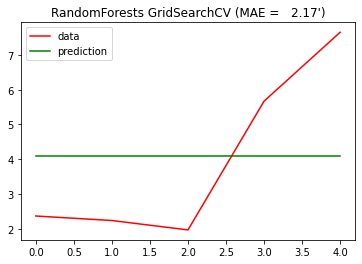

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(test['TDFfinal_static'].shape[0]))
plt.plot(xx, test['TDFfinal_static'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests GridSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

In [ ]:
#Ahora utilizaré la técnica RandomizedSearch
param_dist = {"n_estimators": [4, 8, 16, 32, 64], # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": [16, 12,8,4, 2,None], # Maximum number of levels in tree
              "min_samples_split": sp_randint(2, 50), #  Minimum number of samples required to split a node
              "min_samples_leaf": sp_randint(1, 50), # Minimum number of samples required at each leaf node
              "bootstrap": [True, False], # Method of selecting samples for training each tree
              "criterion": ["mse", "mae"]}

In [ ]:
rnd_regres = RandomizedSearchCV(estimator = regressor, param_distributions = param_dist, 
                               n_iter = 100, cv = 5, random_state=0, n_jobs = -1)

# Fit the random search model
rnd_regres.fit(X = train.drop(['TDFfinal_static'], axis=1), y = train['TDFfinal_static'])

In [ ]:
#Con esto se obtiene la mejor parametrización
rnd_regres.best_params_

In [ ]:
best_random = rnd_regres.best_estimator_
# fit and predict
best_random.fit( X = train.drop(['TDFfinal_static'], axis=1), y = train['TDFfinal_static'])
y_pred = best_random.predict(X = test.drop(['TDFfinal_static'], axis = 1))

# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['TDFfinal_static'], y_pred)
print ('MAE', mae)

MAE 2.1369999999999996


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


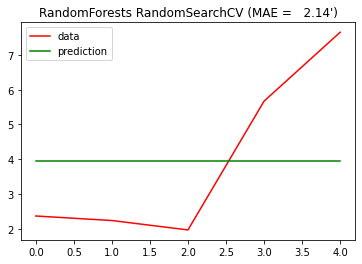

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(test['TDFfinal_static'].shape[0]))
plt.plot(xx, test['TDFfinal_static'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests RandomSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

In [ ]:
#Ahora realizaré una optimización utilizando la técnica de Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

param_dist = {
 "n_estimators": [8, 32, 64, 128],
 "learning_rate" : [0.01,0.05,0.1],
 "loss" : ['linear', 'square', 'exponential']
 }

grid_ada = GridSearchCV(AdaBoostRegressor(DecisionTreeRegressor(criterion='mae')),
                        param_grid = param_dist, cv=5)

grid_ada.fit(X = train.drop(['TDFfinal_static'], axis=1),y = train['TDFfinal_static'])


best_ada = grid_ada.best_estimator_
print (best_ada)
# fit and predict
best_ada.fit( X = train.drop(['TDFfinal_static'], axis=1), y = train['TDFfinal_static'])
y_pred = best_ada.predict(X = test.drop(['TDFfinal_static'], axis = 1))

# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['TDFfinal_static'], y_pred)
print ('MAE', mae)

In [ ]:
#Por último lo haré para GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor

param_dist = {
 "n_estimators": [32, 64, 128],
 "learning_rate" : [0.01,0.05,0.1,0.25,0.5],
  "max_features" : ["auto", "sqrt"],
 "loss" : ['ls', 'lad', 'huber', 'quantile'],
 "criterion": ['mae', 'friedman_mse']
 }

grid_gb = GridSearchCV(GradientBoostingRegressor(), param_grid = param_dist, cv=5)

grid_gb.fit(X = train.drop(['TDFfinal_static'], axis=1),y = train['TDFfinal_static'])


best_gb = grid_gb.best_estimator_
print (best_gb)
# fit and predict
best_gb.fit( X = train.drop(['TDFfinal_static'], axis=1), y = train['TDFfinal_static'])
y_pred = best_gb.predict(X = test.drop(['TDFfinal_static'], axis = 1))

# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['TDFfinal_static'], y_pred)
print ('MAE', mae)

Voy a analizar la composición isotópica del músculo de los peces al final del experimento (d15N)

In [ ]:
# 0. load data in DataFrame
import pandas as pd
import io
import numpy as np

In [ ]:
# 0. load data from file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving TFM_Data_30Abr2020.csv to TFM_Data_30Abr2020.csv
User uploaded file "TFM_Data_30Abr2020.csv" with length 1501 bytes


In [ ]:
df=pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
df

,ID_treatment,ID_species,Temperature,Experiment duration,Tcor,ri_cor,ro_cor,Experimental Wmin,Experimental Wmax,d15N min,d15N max,d15N diet,TDFfinal_static,TDFfinal_dynamic,kg
0,1,1,19.9,180,0.99,0.06,0.007,70.065,140.2,15.6,10.4,3.71,6.69,6.03,0.30281
1,2,2,11.0,150,0.42,0.37,0.064,10.600,120.3,11.9,14.6,12.49,2.08,1.73,0.15692
2,3,1,20.4,180,1.04,0.11,0.010,126.040,400.2,12.0,7.9,3.71,4.17,6.56,0.32163
3,4,3,17.0,90,0.75,0.03,0.019,0.975,2.1,16.1,13.2,9.14,4.04,4.05,0.23835
4,5,4,19.2,98,0.93,0.12,0.050,1.440,8.8,13.5,7.5,3.80,3.72,4.57,0.23786
5,6,4,19.2,98,0.93,0.06,0.013,1.440,8.8,13.0,7.5,3.80,3.71,4.79,0.24970
6,7,5,18.0,102,0.83,0.02,0.012,0.840,1.7,8.2,14.0,15.00,-0.96,2.03,0.11262
7,8,6,24.1,104,1.46,0.03,0.005,16.900,31.3,13.0,10.1,3.70,6.45,6.38,0.26452
8,9,7,26.6,94,1.82,0.04,0.004,9.700,42.9,14.4,7.5,3.70,3.78,3.55,0.13330
9,10,7,26.8,98,1.85,0.05,0.004,9.400,67.6,14.4,7.7,3.70,4.03,4.67,0.17412


In [ ]:
#Elimino todas las filas que tienen valores nulos
df=df.dropna()
df.isnull().values.any()

False

In [ ]:
#Divido el data set
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [ ]:
# 0.1 features and labels

df.reset_index(drop=True, inplace=True)
train = df.loc[0:len(df)*0.3]
test  = df.loc[len(df)*0.7:,]

display_side_by_side(train.tail(),test.head())

,ID_treatment,ID_species,Temperature,Experiment duration,Tcor,ri_cor,ro_cor,Experimental Wmin,Experimental Wmax,d15N min,d15N max,d15N diet,TDFfinal_static,TDFfinal_dynamic,kg,% Dietary Protein
1,2,2,11.0,150,0.42,0.37,0.064,10.600,120.3,11.9,14.6,12.49,2.08,1.73,0.15692,18.9
2,3,1,20.4,180,1.04,0.11,0.010,126.040,400.2,12.0,7.9,3.71,4.17,6.56,0.32163,69.1
3,4,3,17.0,90,0.75,0.03,0.019,0.975,2.1,16.1,13.2,9.14,4.04,4.05,0.23835,61.7
4,5,4,19.2,98,0.93,0.12,0.050,1.440,8.8,13.5,7.5,3.80,3.72,4.57,0.23786,50.0
5,6,4,19.2,98,0.93,0.06,0.013,1.440,8.8,13.0,7.5,3.80,3.71,4.79,0.24970,50.0
,ID_treatment,ID_species,Temperature,Experiment duration,Tcor,ri_cor,ro_cor,Experimental Wmin,Experimental Wmax,d15N min,d15N max,d15N diet,TDFfinal_static,TDFfinal_dynamic,kg,% Dietary Protein
13,14,8,22.0,98,1.20,0.14,0.019,28.00,148.1,10.7,14.9,12.5,2.37,2.14,0.09722,61.3
14,15,8,22.0,98,1.20,0.17,0.025,21.50,153.0,11.0,12.9,10.7,2.24,2.80,0.12744,56.9
15,16,9,23.0,100,1.32,0.06,0.005,10.30,71.5,10.7,15.7,13.8,1.97,4.08,0.17730,51.0
16,17,10,26.0,196,1.73,0.05,0.005,1444.00,1634.0,11.4,11.9,10.3,5.67,1.50,0.05769,62.0


In [ ]:
# reseteamos el index con el fin de no evitar problemas en la validación cruzada
train.reset_index(drop = True, inplace = True)

In [ ]:
##Parametrizacion
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint #Para hacer intervalos aleatorios de los valores

from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
regressor = RandomForestRegressor()

In [ ]:
param_dist = {"n_estimators": [32, 64, 128], # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": [8,4, 2], # Maximum number of levels in tree
              "min_samples_split": [2, 4, 6], #  Minimum number of samples required to split a node
              "min_samples_leaf": [8, 12, 16], # Minimum number of samples required at each leaf node
              "bootstrap": [True, False] # Method of selecting samples for training each tree
            }

In [ ]:
#Busqueda de validacion cruzada
grid_regres = GridSearchCV(estimator = regressor, param_grid= param_dist, cv = 5)

# Fit the random search model
grid_regres.fit(X = train.drop(['d15N max'], axis=1), 
                           y = train['d15N max'])

In [ ]:
grid_regres.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=32, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# choose the best
best_grid = grid_regres.best_estimator_

# fit and predict
best_grid.fit( X = train.drop(['d15N max'], axis=1), y = train['d15N max'])
y_pred = best_grid.predict(X = test.drop(['d15N max'], axis = 1))

# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['d15N max'], y_pred)
print ('MAE', mae)

MAE 3.437395833333332


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


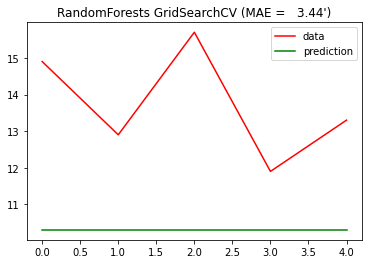

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(test['d15N max'].shape[0]))
plt.plot(xx, test['d15N max'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests GridSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

In [ ]:
#Ahora utilizaré la técnica RandomizedSearch
param_dist = {"n_estimators": [4, 8, 16, 32, 64], # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": [16, 12,8,4, 2,None], # Maximum number of levels in tree
              "min_samples_split": sp_randint(2, 50), #  Minimum number of samples required to split a node
              "min_samples_leaf": sp_randint(1, 50), # Minimum number of samples required at each leaf node
              "bootstrap": [True, False], # Method of selecting samples for training each tree
              "criterion": ["mse", "mae"]}

In [ ]:
rnd_regres = RandomizedSearchCV(estimator = regressor, param_distributions = param_dist, 
                               n_iter = 100, cv = 5, random_state=0, n_jobs = -1)

# Fit the random search model
rnd_regres.fit(X = train.drop(['d15N max'], axis=1), y = train['d15N max'])

In [ ]:
#Con esto se obtiene la mejor parametrización
rnd_regres.best_params_

In [ ]:
best_random = rnd_regres.best_estimator_
# fit and predict
best_random.fit( X = train.drop(['d15N max'], axis=1), y = train['d15N max'])
y_pred = best_random.predict(X = test.drop(['d15N max'], axis = 1))

# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['d15N max'], y_pred)
print ('MAE', mae)

MAE 4.115


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


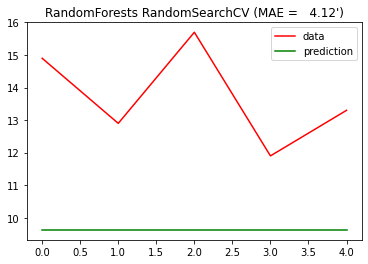

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(test['d15N max'].shape[0]))
plt.plot(xx, test['d15N max'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests RandomSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

In [ ]:
#Ahora realizaré una optimización utilizando la técnica de Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

param_dist = {
 "n_estimators": [8, 32, 64, 128],
 "learning_rate" : [0.01,0.05,0.1],
 "loss" : ['linear', 'square', 'exponential']
 }

grid_ada = GridSearchCV(AdaBoostRegressor(DecisionTreeRegressor(criterion='mae')),
                        param_grid = param_dist, cv=5)

grid_ada.fit(X = train.drop(['d15N max'], axis=1),y = train['d15N max'])


best_ada = grid_ada.best_estimator_
print (best_ada)
# fit and predict
best_ada.fit( X = train.drop(['d15N max'], axis=1), y = train['d15N max'])
y_pred = best_ada.predict(X = test.drop(['d15N max'], axis = 1))

# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['d15N max'], y_pred)
print ('MAE', mae)

In [ ]:
#Por último lo haré para GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor

param_dist = {
 "n_estimators": [32, 64, 128],
 "learning_rate" : [0.01,0.05,0.1,0.25,0.5],
  "max_features" : ["auto", "sqrt"],
 "loss" : ['ls', 'lad', 'huber', 'quantile'],
 "criterion": ['mae', 'friedman_mse']
 }

grid_gb = GridSearchCV(GradientBoostingRegressor(), param_grid = param_dist, cv=5)

grid_gb.fit(X = train.drop(['d15N max'], axis=1),y = train['d15N max'])


best_gb = grid_gb.best_estimator_
print (best_gb)
# fit and predict
best_gb.fit( X = train.drop(['d15N max'], axis=1), y = train['d15N max'])
y_pred = best_gb.predict(X = test.drop(['d15N max'], axis = 1))

# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['d15N max'], y_pred)
print ('MAE', mae)